In [1]:
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Embedding

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
nlp.vocab["king"].similarity(nlp.vocab["queen"])

0.6108841896057129

In [4]:
king_vec = nlp.vocab["king"].vector
queen_vec = nlp.vocab["queen"].vector
man_vec = nlp.vocab["man"].vector
woman_vec = nlp.vocab["women"].vector

<Axes: >

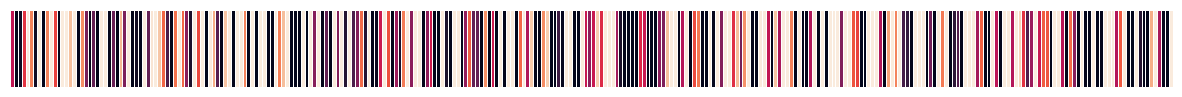

In [5]:
plt.figure(figsize=(15,1))
sns.heatmap([king_vec], xticklabels=False, yticklabels=False, cbar=False,
            vmin=-2, vmax=2, linewidths=0.7)
# plt.show()

<Axes: >

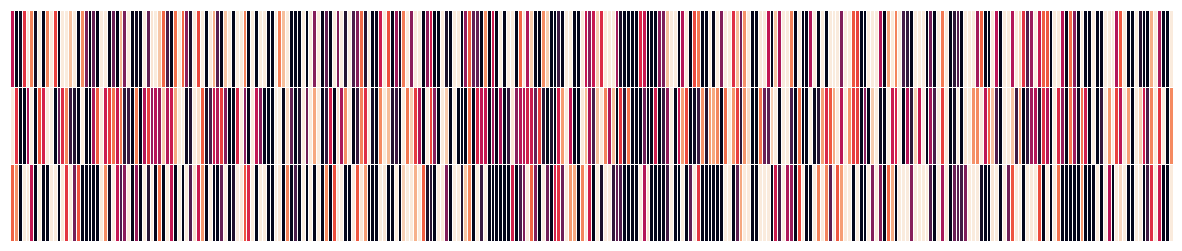

In [6]:
plt.figure(figsize=(15,3))
sns.heatmap([king_vec, queen_vec, king_vec-man_vec+woman_vec], xticklabels=False, yticklabels=False, cbar=False,
            vmin=-2, vmax=2, linewidths=0.7)

# Classification

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [10]:
dataset = fetch_20newsgroups(data_home="./data", subset="all")

In [11]:
X, y = dataset.data, dataset.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
for token in  nlp("Apple is looking at buying U.K. startup for $1 billion"):
  print('Word: {}  --> {}'.format(token.text, token.lemma_))

Word: Apple  --> Apple
Word: is  --> be
Word: looking  --> look
Word: at  --> at
Word: buying  --> buy
Word: U.K.  --> U.K.
Word: startup  --> startup
Word: for  --> for
Word: $  --> $
Word: 1  --> 1
Word: billion  --> billion


In [34]:
def text2vec(text):
    text = nlp(text)
    text_vecs = [nlp(word.lemma_).vector for word in text]
    if len(text_vecs) > 1:
        return np.mean(text_vecs, axis = 0)
    elif len(text_vecs) == 1:
        return text_vecs[0]
    else:
        return np.nan

In [35]:
X = [text2vec(text) for text in X]
# X
# word = nlp(X[0])[0]
# nlp(word.lemma_).vector

KeyboardInterrupt: 

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=dataset.target_names))